<a href="https://colab.research.google.com/github/sahiser19/ST-554-Project1-Sarah_Ryan_Heather/blob/Task-1---Sarah/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#!pip install ucimlrepo
#import ucimlrepo as uci
#air_quality = uci.fetch_ucirepo(id=360)

# Task 1:

1. Two gradient descent type algorithms to find the optimal constant to use for squared error loss.

2. To find the optimal intercept and slope from a
simple linear regression model.



The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.


<div class="markdown-google-sans">

## Data Ingestion and Prep
</div>

Data is held in a zip file with an Excel file and a .csv file. We will be utilizing the .csv file loaded locally for this project.

In [1]:
import numpy as np
import pandas as pd
import IPython.display as display
from matplotlib import pyplot as plt
import os
import IPython as ip

In [31]:
air_quality = pd.read_csv("AirQualityUCI.csv", sep=";")
print(air_quality.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

We will use shape to determine the dimensions of the dataframe (17 columns and 9,471 rows) First, we can see that floating numeric observations are noted as both a "," and a "." to hold the decimal place. We will update the "," to a "." and identifying missing values.

In [32]:
print(air_quality.shape)
air_quality.info()

(9471, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1

In [33]:
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [34]:
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    if air_quality[col].dtype == 'object':
        air_quality[col] = air_quality[col].str.replace(',', '.', regex=False)
        air_quality[col] = pd.to_numeric(air_quality[col], errors='coerce')
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [28]:
air_quality = air_quality[air_quality['C6H6(GT)'] != -200]
air_quality = air_quality[air_quality['CO(GT)'] != -200]
print((air_quality['C6H6(GT)'] == -200).sum())
print((air_quality['CO(GT)'] == -200).sum())

0
0


Prediction of C6H6(GT)
1. Loss function - Define RMSE for next steps
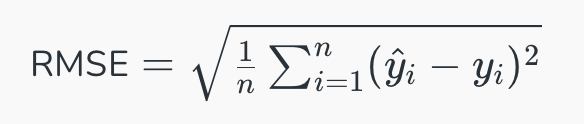

Here we will load califonia housing dataset from scikit learn:

1. fetch_california_housing(as_frame=True): loads the dataset as a pandas DataFrame.
2. data.frame: gives the complete dataset with features and target.
3. drop('MedHouseVal', axis=1): removes target column to get only features (X).
4. df['MedHouseVal']: target column containing house values (y).

In [38]:
import sklearn as sci
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [60]:
y = air_quality["C6H6(GT)"].dropna()
print(len(y), y.isna().sum(), np.isfinite(y).all())
print(np.quantile(y, [0.25, 0.75]))

9357 0 True
[ 4.  13.6]


In [61]:
def best_constant_by_grid(y, grid):
    y = np.asarray(y, dtype=float)

    # compute RMSE(c) for each c
    rmses = np.array([rmse_np(y, np.full_like(y, c)) for c in grid])

    # pick best
    idx = np.argmin(rmses)
    return grid[idx], rmses[idx]

In [62]:
def make_c_grid_from_quartiles(y, step=0.01):
    q1, q3 = np.quantile(y, [0.25, 0.75])
    return np.arange(q1, q3 + step, step)

In [63]:
y_filtered = air_quality["C6H6(GT)"].dropna()
c_grid = make_c_grid_from_quartiles(y_filtered, step=0.01)
best_c, best_rmse = best_constant_by_grid(y_filtered, c_grid)

In [64]:
def rmse_np(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

PT08.S1(CO)

In [66]:
def best_constant_by_grid(y2, grid):
    y2 = np.asarray(y2, dtype=float)

    # compute RMSE(c) for each c
    rmses = np.array([rmse_np(y2, np.full_like(y2, c)) for c in grid])

    # pick best
    idx = np.argmin(rmses)
    return grid[idx], rmses[idx]

In [67]:
def make_c_grid_from_quartiles(y2, step=0.01):
    q1, q3 = np.quantile(y2, [0.25, 0.75])
    return np.arange(q1, q3 + step, step)

In [68]:
x_filtered = air_quality["PT08.S1(CO)"].dropna()
c_grid = make_c_grid_from_quartiles(y_filtered, step=0.01)
best_c, best_rmse = best_constant_by_grid(x_filtered, c_grid)

GRID Search for SLR

In [57]:
def grid_search_slr(x, y,
                    b0_min=-25, b0_max=-15, b0_step=0.1,
                    b1_min=-5,  b1_max=5,  b1_step=0.01):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)

    b0_grid = np.arange(b0_min, b0_max + 1e-12, b0_step)
    b1_grid = np.arange(b1_min, b1_max + 1e-12, b1_step)

    best_rmse = np.inf
    best_b0 = None
    best_b1 = None

    for b1 in b1_grid:
        bx = b1 * x  # reused for all b0 at this b1
        for b0 in b0_grid:
            y_pred = b0 + bx
            r = rmse_np(y, y_pred)
            if r < best_rmse:
                best_rmse = r
                best_b0 = b0
                best_b1 = b1

    return best_b0, best_b1, best_rmse

In [75]:
b0_hat, b1_hat, best = grid_search_slr(x_filtered, y_filtered)

In [76]:
preds = b0_hat + b1_hat * np.array([946, 1075, 1246], dtype=float)
preds

array([ 3.38,  7.25, 12.38])

In [73]:
X_train.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
7563,19/01/2005,21.00.00,2.6,1016.0,-200.0,892.0,317.0,758.0,141.0,1109.0,945.0,9.2,49.8,0.5808,NaN,NaN
3991,24/08/2004,01.00.00,1.2,919.0,-200.0,799.0,29.0,844.0,50.0,1409.0,881.0,22.2,43.1,1.1396,NaN,NaN
5712,03/11/2004,18.00.00,3.7,1333.0,-200.0,1312.0,383.0,520.0,107.0,1853.0,1364.0,23.8,51.4,1.4956,NaN,NaN
472,30/03/2004,10.00.00,4.7,1565.0,735.0,1324.0,320.0,695.0,159.0,1872.0,1688.0,17.9,28.2,0.5741,NaN,NaN
4246,03/09/2004,16.00.00,-200.0,1130.0,-200.0,1113.0,-200.0,674.0,-200.0,1623.0,1127.0,38.8,17.6,1.1979,NaN,NaN


<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Train a miniGPT language model with JAX AI Stack](https://docs.jaxstack.ai/en/latest/JAX_for_LLM_pretraining.html)
- [LoRA/QLoRA finetuning for LLM using Tunix](https://github.com/google/tunix/blob/main/examples/qlora_gemma.ipynb)
- [Parameter-efficient fine-tuning of Gemma with LoRA and QLoRA](https://keras.io/examples/keras_recipes/parameter_efficient_finetuning_of_gemma_with_lora_and_qlora/)
- [Loading Hugging Face Transformers Checkpoints](https://keras.io/keras_hub/guides/hugging_face_keras_integration/)
- [8-bit Integer Quantization in Keras](https://keras.io/guides/int8_quantization_in_keras/)
- [Float8 training and inference with a simple Transformer model](https://keras.io/examples/keras_recipes/float8_training_and_inference_with_transformer/)
- [Pretraining a Transformer from scratch with KerasHub](https://keras.io/keras_hub/guides/transformer_pretraining/)
- [Simple MNIST convnet](https://keras.io/examples/vision/mnist_convnet/)
- [Image classification from scratch using Keras 3](https://keras.io/examples/vision/image_classification_from_scratch/)
- [Image Classification with KerasHub](https://keras.io/keras_hub/guides/classification_with_keras_hub/)
